So
filling in gaos for presentations anf EOY review.

previous runs ahave lr centered around xe-5
I need to have more spaced out in log units of ten

the following have been redone
Batched
2c
3c
4c
6c - almost finished

Not done
Batched
Vgg - keeps stoppping
7c

and alll unbatched


Thoughts - for 7c and vgg, not gunnahave them all donw in time BUT may be able to do so for the smaller resolutions.



|condition|model|res|log lr|
|---------|----|-----|--|
|Batched|2c|all|yes|
|Batched|3c|all|yes|
|Batched|4c|all|yes|
|Batched|6c|missing 83|yes|
|Batched|7c|none|no, only xe-5|
|Batched|vgg|none|keeps stopping|
|||||

There are too many inconsistant variables
most recently annoying - unbatched trained for 20 epochs... batched for 40 r 60 (60 for the log lrs)

So..
Just don't show any unbatched. only batched data

# Re read in csvs and only make the graphs I want

## read in csvs

 just looking at batched code bc of consistancy errors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast #import ast
import sys
sys.path.append('../.')
from skimpy import skim
from plotting import plot_confusion, learning_curve
import os
os.getcwd()

'/its/home/nn268/antvis/antvis/optics/Captains_Log'

In [2]:
def accuracy_curve(run_name:str, legend:list,save_location=None, *args,  plot=True):
    #save_location = check_save_path(save_location)
    #lab = "VGG16 Accuracies for varying model sizes \n Rremoving layers from the front vs removing from the back "+run_name
    font1 = {'family':'georgia','color':'darkblue','size':19}
    font2 = {'family':'georgia','color':'darkblue','size':15}
    #data= args[1:]
    for idx,arg in enumerate(args):
        #print("\n BNBNBN \n ",'idx: ', idx, '  arg: ', arg[0], 'XCXCXC', "len of arg",len(arg))
        #print("\n TYTYTYTY \n",'idx: ', idx, '  args: ', args[0], 'XCXCXC',"len of args", len(args))
        if isinstance(arg[0], str):
            #print('inst arg[0] is string')
            label = arg[0]
            start =1
            #plt.plot(range(len(args[0])-1), arg[start:], label=label)#, label =str(args[0]))
            plt.plot(range(len(arg)+1), arg[start:], label=label)#, label =str(args[0]))
        else:
            #print('arg[0] not string')
            label= legend[idx]
            start=0
        #plt.plot(range(len(args[0])), arg[start:], label=label)#, label =str(args[0]))
        #print(len(arg))
        plt.plot(range(len(arg)), arg[start:], label=label)#, label =str(args[0]))

    plt.xticks(range(len(arg)+1), rotation=90)#, list(args.keys()))
    #plt.set_xlim(1,11) #ax.set_xlim(1, 24)
    plt.title(run_name+"\n Accuracy Curve ", font1)
    plt.xlabel('Layers', font2)
    plt.ylabel('Accuracy', font2)
    #plt.yscale("log")
    plt.legend()
    if save_location != None:
        plt.savefig(save_location+'/'+run_name+'.png') #run_name
    else:
        print("Save Location Not Specified!")
    if plot:
        plt.show()

### 2c

In [3]:
# .././
file_path_b_2c2l_452144_1 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[452, 144]_2024-04-24.csv'
file_path_b_2c2l_452144_2 =r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[452, 144]_2024-05-22.csv'
file_path_b_2c2l_452144_3 =r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[452, 144]_2024-06-03.csv'

file_path_b_2c2l_22672_1 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[226, 72]_2024-04-24.csv'
file_path_b_2c2l_22672_2 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[226, 72]_2024-05-22.csv'
file_path_b_2c2l_22672_3 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[226, 72]_2024-06-03.csv'

file_path_b_2c2l_11336_1 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[113, 36]_2024-04-24.csv'
file_path_b_2c2l_11336_2 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[113, 36]_2024-05-22.csv'
file_path_b_2c2l_11336_3 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[113, 36]_2024-06-03.csv'
file_path_b_2c2l_11336_4 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[113, 36]_2024-06-06.csv'


file_path_b_2c2l_5718 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[57, 18]_2024-04-24.csv'
file_path_b_2c2l_5718_2 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[57, 18]_2024-05-22.csv'
file_path_b_2c2l_5718_3 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[57, 18]_2024-06-03.csv'
file_path_b_2c2l_5718_4 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[57, 18]_2024-06-06.csv'


file_path_b_2c2l_299 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[29, 9]_2024-04-24.csv'
file_path_b_2c2l_299_2 =  r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[29, 9]_2024-05-22.csv'
file_path_b_2c2l_299_3 =  r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[29, 9]_2024-06-03.csv'

file_path_b_2c2l_155 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[15, 5]_2024-04-24.csv'
file_path_b_2c2l_155_2 =  r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[15, 5]_2024-05-22.csv'
file_path_b_2c2l_155_3 =  r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[15, 5]_2024-06-03.csv'


file_path_b_2c2l_83 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[8, 3]_2024-04-24.csv'
file_path_b_2c2l_83_2 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[8, 3]_2024-05-22.csv'
file_path_b_2c2l_83_3 = r'.././res_big_loop_saves/models/batch/2c2l/2c2l_[8, 3]_2024-06-03.csv'



df_b_2c2l_452144_1 = pd.read_csv(file_path_b_2c2l_452144_1)
df_b_2c2l_452144_2 = pd.read_csv(file_path_b_2c2l_452144_2)
df_b_2c2l_452144_3 = pd.read_csv(file_path_b_2c2l_452144_3)
df_b_2c2l_452144 = pd.concat([df_b_2c2l_452144_1, df_b_2c2l_452144_2, df_b_2c2l_452144_3], ignore_index=True)
# df['col1'] = df['col1'].fillna(0)
df_b_2c2l_452144 = df_b_2c2l_452144.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
df_b_2c2l_452144 = df_b_2c2l_452144.fillna(0)


df_b_2c2l_22672_1 = pd.read_csv(file_path_b_2c2l_22672_1)
df_b_2c2l_22672_2 = pd.read_csv(file_path_b_2c2l_22672_2)
df_b_2c2l_22672_3 = pd.read_csv(file_path_b_2c2l_22672_3) 
df_b_2c2l_22672 = pd.concat([df_b_2c2l_22672_1, df_b_2c2l_22672_2, df_b_2c2l_22672_3], ignore_index=True)

df_b_2c2l_22672 = df_b_2c2l_22672.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
df_b_2c2l_22672 = df_b_2c2l_22672.fillna(0)

df_b_2c2l_11336_1 = pd.read_csv(file_path_b_2c2l_11336_1)
df_b_2c2l_11336_2 = pd.read_csv(file_path_b_2c2l_11336_2)
df_b_2c2l_11336_3 = pd.read_csv(file_path_b_2c2l_11336_3)
df_b_2c2l_11336_4 = pd.read_csv(file_path_b_2c2l_11336_4)
df_b_2c2l_11336 = pd.concat([df_b_2c2l_11336_1, df_b_2c2l_11336_2, df_b_2c2l_11336_3,df_b_2c2l_11336_4], ignore_index=True)
df_b_2c2l_11336 = df_b_2c2l_11336.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
df_b_2c2l_11336 = df_b_2c2l_11336.fillna(0)

df_b_2c2l_5718_1 = pd.read_csv(file_path_b_2c2l_5718)
df_b_2c2l_5718_2 = pd.read_csv(file_path_b_2c2l_5718_2)
df_b_2c2l_5718_3 = pd.read_csv(file_path_b_2c2l_5718_3)
df_b_2c2l_5718_4 = pd.read_csv(file_path_b_2c2l_5718_4)
df_b_2c2l_5718 = pd.concat([df_b_2c2l_5718_1, df_b_2c2l_5718_2, df_b_2c2l_5718_3, df_b_2c2l_5718_4], ignore_index=True)

df_b_2c2l_5718 = df_b_2c2l_5718.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
df_b_2c2l_5718 = df_b_2c2l_5718.fillna(0)

df_b_2c2l_299_1 = pd.read_csv(file_path_b_2c2l_299)
df_b_2c2l_299_2 = pd.read_csv(file_path_b_2c2l_299_2)
df_b_2c2l_299_3 = pd.read_csv(file_path_b_2c2l_299_3)
df_b_2c2l_299 = pd.concat([df_b_2c2l_299_1, df_b_2c2l_299_2, df_b_2c2l_299_3], ignore_index=True)

df_b_2c2l_299 = df_b_2c2l_299.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
df_b_2c2l_299 = df_b_2c2l_299.fillna(0)

df_b_2c2l_155_1 = pd.read_csv(file_path_b_2c2l_155)
df_b_2c2l_155_2 = pd.read_csv(file_path_b_2c2l_155_2)
df_b_2c2l_155_3 = pd.read_csv(file_path_b_2c2l_155_3)
df_b_2c2l_155 = pd.concat([df_b_2c2l_155_1, df_b_2c2l_155_2,df_b_2c2l_155_3], ignore_index=True)

df_b_2c2l_155 = df_b_2c2l_155.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
df_b_2c2l_155 = df_b_2c2l_155.fillna(0)

df_b_2c2l_83_1 = pd.read_csv(file_path_b_2c2l_83)
df_b_2c2l_83_2 = pd.read_csv(file_path_b_2c2l_83_2)
df_b_2c2l_83_3 = pd.read_csv(file_path_b_2c2l_83_3)
df_b_2c2l_83 = pd.concat([df_b_2c2l_83_1, df_b_2c2l_83_2, df_b_2c2l_83_3], ignore_index=True)

df_b_2c2l_83 = df_b_2c2l_83.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
df_b_2c2l_83 = df_b_2c2l_83.fillna(0)


In [4]:
fir_2c2l = pd.concat([df_b_2c2l_452144, df_b_2c2l_22672, df_b_2c2l_11336, df_b_2c2l_5718, df_b_2c2l_299, df_b_2c2l_155, df_b_2c2l_83], ignore_index=True)
# remove wd and ched vals
df_all_b_2c = fir_2c2l[(fir_2c2l['wd']==0)&(fir_2c2l['scheduler value']==0)]


/its/home/nn268/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


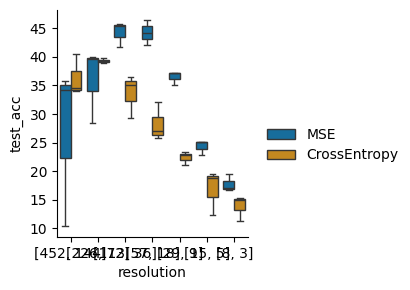

In [5]:
df_all_b_2c_1e4 = df_all_b_2c[(df_all_b_2c['lr'] == 1e-4)&(df_all_b_2c['Current_Epoch']==60)]

g= sns.FacetGrid(df_all_b_2c_1e4, margin_titles=True, legend_out=True) #col='lr',  row= "Current_Epoch",

g.map(sns.boxplot, "resolution", "test_acc", hue=df_all_b_2c_1e4["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

### 3c

In [6]:
# .././
file_path_b_3c2l_452144_1 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[452, 144]_2024-04-24.csv'
file_path_b_3c2l_452144_betterlr = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[452, 144]_2024-05-22.csv'
#file_path_b_3c2l_452144_2 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[452, 144]_2024-05-22.csv'
file_path_b_3c2l_452144_3 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[452, 144]_2024-06-04.csv'

file_path_b_3c2l_22672_1 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[226, 72]_2024-04-22.csv'
file_path_b_3c2l_22672_2 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[226, 72]_2024-05-22.csv'
file_path_b_3c2l_22672_3 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[226, 72]_2024-06-04.csv'

file_path_b_3c2l_11336_1 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[113, 36]_2024-04-22.csv'
file_path_b_3c2l_11336_2 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[113, 36]_2024-05-22.csv'
file_path_b_3c2l_11336_3 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[113, 36]_2024-06-04.csv'

file_path_b_3c2l_5718_1 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[57, 18]_2024-04-22.csv'
file_path_b_3c2l_5718_2 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[57, 18]_2024-05-22.csv'
file_path_b_3c2l_5718_3 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[57, 18]_2024-06-04.csv'

file_path_b_3c2l_299_1 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[29, 9]_2024-04-22.csv'
file_path_b_3c2l_299_2 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[29, 9]_2024-05-22.csv'

file_path_b_3c2l_155_1 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[15, 5]_2024-04-22.csv'
file_path_b_3c2l_155_2 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[15, 5]_2024-05-30.csv'

file_path_b_3c2l_83_1 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[8, 3]_2024-04-22.csv'
file_path_b_3c2l_83_2 = r'.././res_big_loop_saves/models/batch/3c2l/3c2l_[8, 3]_2024-05-30.csv'


df_b_3c2l_452144_1 = pd.read_csv(file_path_b_3c2l_452144_1)
df_b_3c2l_452144_lrs = pd.read_csv(file_path_b_3c2l_452144_betterlr)
df_b_3c2l_452144_3 = pd.read_csv(file_path_b_3c2l_452144_3)
df_b_3c2l_452144 = pd.concat([df_b_3c2l_452144_1, df_b_3c2l_452144_lrs,df_b_3c2l_452144_3], ignore_index=True)

df_b_3c2l_22672_1 = pd.read_csv(file_path_b_3c2l_22672_1)
df_b_3c2l_22672_2 = pd.read_csv(file_path_b_3c2l_22672_2)
df_b_3c2l_22672_3 = pd.read_csv(file_path_b_3c2l_22672_3)
df_b_3c2l_22672 = pd.concat([df_b_3c2l_22672_1, df_b_3c2l_22672_2,df_b_3c2l_22672_3], ignore_index=True)

df_b_3c2l_11336_1 = pd.read_csv(file_path_b_3c2l_11336_1)
df_b_3c2l_11336_2 = pd.read_csv(file_path_b_3c2l_11336_2)
df_b_3c2l_11336_3 = pd.read_csv(file_path_b_3c2l_11336_3)
df_b_3c2l_11336 = pd.concat([df_b_3c2l_11336_1, df_b_3c2l_11336_2,df_b_3c2l_11336_3], ignore_index=True)

df_b_3c2l_5718_1 = pd.read_csv(file_path_b_3c2l_5718_1)
df_b_3c2l_5718_2 = pd.read_csv(file_path_b_3c2l_5718_2)
df_b_3c2l_5718_3 = pd.read_csv(file_path_b_3c2l_5718_3)
df_b_3c2l_5718 = pd.concat([df_b_3c2l_5718_1, df_b_3c2l_5718_2,df_b_3c2l_5718_3], ignore_index=True)

df_b_3c2l_299_1 = pd.read_csv(file_path_b_3c2l_299_1)
df_b_3c2l_299_2 = pd.read_csv(file_path_b_3c2l_299_2)
df_b_3c2l_299 = pd.concat([df_b_3c2l_299_1, df_b_3c2l_299_2], ignore_index=True)


df_b_3c2l_155_1 = pd.read_csv(file_path_b_3c2l_155_1)
df_b_3c2l_155_2 = pd.read_csv(file_path_b_3c2l_155_2)

df_b_3c2l_155 = pd.concat([df_b_3c2l_155_1, df_b_3c2l_155_2], ignore_index=True)

df_b_3c2l_83_1 = pd.read_csv(file_path_b_3c2l_83_1)
df_b_3c2l_83_2 = pd.read_csv(file_path_b_3c2l_83_2)
df_b_3c2l_83 = pd.concat([df_b_3c2l_83_1, df_b_3c2l_83_2], ignore_index=True)


In [7]:
all_3c2l = pd.concat([df_b_3c2l_452144, df_b_3c2l_22672, df_b_3c2l_11336, df_b_3c2l_5718, df_b_3c2l_299, df_b_3c2l_155, df_b_3c2l_83])
fir_3x_al = pd.concat([df_b_3c2l_452144_1, df_b_3c2l_22672_1, df_b_3c2l_11336_1, df_b_3c2l_5718_1, df_b_3c2l_299_1, df_b_3c2l_83], ignore_index=True)
# remove wd and ched vals
df_3c_sameparams1 = all_3c2l[(all_3c2l['wd']==0)&(all_3c2l['scheduler value']==0)]
df_fir_3c_sameparams1 = fir_3x_al[(fir_3x_al['wd']==0)&(fir_3x_al['scheduler value']==0)]



df_all_b_3c = pd.concat([df_3c_sameparams1, df_fir_3c_sameparams1], ignore_index=True)


/its/home/nn268/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


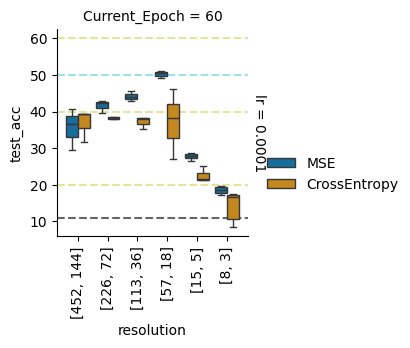

In [8]:
df_all_b_3c_e4 = df_all_b_3c[(df_all_b_3c['lr']==1e-4)&(df_all_b_3c['Current_Epoch']== 60)]

g= sns.FacetGrid(df_all_b_3c_e4,col='Current_Epoch', row= "lr", margin_titles=True, legend_out=True)

g.map(sns.boxplot, "resolution", "test_acc", hue=df_all_b_3c_e4["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

### 4c

In [9]:
file_path_b_4c3l_452144_1 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[452, 144]_2024-04-23.csv'
file_path_b_4c3l_452144_2 =  r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[452, 144]_2024-06-04.csv'

file_path_b_4c3l_22672 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[226, 72]_2024-04-24.csv'



file_path_b_4c3l_11336_1 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[113, 36]_2024-04-25.csv'
file_path_b_4c3l_11336_2 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[113, 36]_2024-05-30.csv'


file_path_b_4c3l_5718_1 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[57, 18]_2024-04-25.csv'
file_path_b_4c3l_5718_2 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[57, 18]_2024-05-30.csv'


file_path_b_4c3l_299_1 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[29, 9]_2024-04-25.csv'
file_path_b_4c3l_299_2 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[29, 9]_2024-05-30.csv'


file_path_b_4c3l_155_1 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[15, 5]_2024-04-25.csv'
file_path_b_4c3l_155_2 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[15, 5]_2024-05-30.csv'


file_path_b_4c3l_83_1 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[8, 3]_2024-04-25.csv'
file_path_b_4c3l_83_2 = r'.././res_big_loop_saves/models/batch/4c3l/4c3l_[8, 3]_2024-05-30.csv'



df_b_4c3l_452144_1 = pd.read_csv(file_path_b_4c3l_452144_1)
df_b_4c3l_452144_2 = pd.read_csv(file_path_b_4c3l_452144_2)
df_b_4c3l_452144 = pd.concat([df_b_4c3l_452144_1, df_b_4c3l_452144_2],  ignore_index=True)

df_b_4c3l_22672 = pd.read_csv(file_path_b_4c3l_22672)


df_b_4c3l_11336_1 = pd.read_csv(file_path_b_4c3l_11336_1)
df_b_4c3l_11336_2 = pd.read_csv(file_path_b_4c3l_11336_2)
df_b_4c3l_11336 = pd.concat([df_b_4c3l_11336_1, df_b_4c3l_11336_2],  ignore_index=True)

df_b_4c3l_5718_1 = pd.read_csv(file_path_b_4c3l_5718_1)
df_b_4c3l_5718_2 = pd.read_csv(file_path_b_4c3l_5718_2)
df_b_4c3l_5718 = pd.concat([df_b_4c3l_5718_1, df_b_4c3l_5718_2],  ignore_index=True)

df_b_4c3l_299_1 = pd.read_csv(file_path_b_4c3l_299_1)
df_b_4c3l_299_2 = pd.read_csv(file_path_b_4c3l_299_2)
df_b_4c3l_299 = pd.concat([df_b_4c3l_299_1, df_b_4c3l_299_2],  ignore_index=True)

df_b_4c3l_155_1 = pd.read_csv(file_path_b_4c3l_155_1)
df_b_4c3l_155_2 = pd.read_csv(file_path_b_4c3l_155_2)
df_b_4c3l_155 = pd.concat([df_b_4c3l_155_1, df_b_4c3l_155_2],  ignore_index=True)

df_b_4c3l_83_1 = pd.read_csv(file_path_b_4c3l_83_1)
df_b_4c3l_83_2 = pd.read_csv(file_path_b_4c3l_83_2)
df_b_4c3l_83 = pd.concat([df_b_4c3l_83_1,df_b_4c3l_83_2], ignore_index=True)


In [10]:
df_all_b_4c = pd.concat([df_b_4c3l_452144, df_b_4c3l_22672, df_b_4c3l_11336, df_b_4c3l_5718, df_b_4c3l_299, df_b_4c3l_155, df_b_4c3l_83], ignore_index=True)

# remove wd and ched vals
df_all_b_4c = df_all_b_4c[(df_all_b_4c['wd']==0)&(df_all_b_4c['scheduler value']==0)]

df_all_b_4c = df_all_b_4c.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
#print(df_4c3l_sameparams1.head)


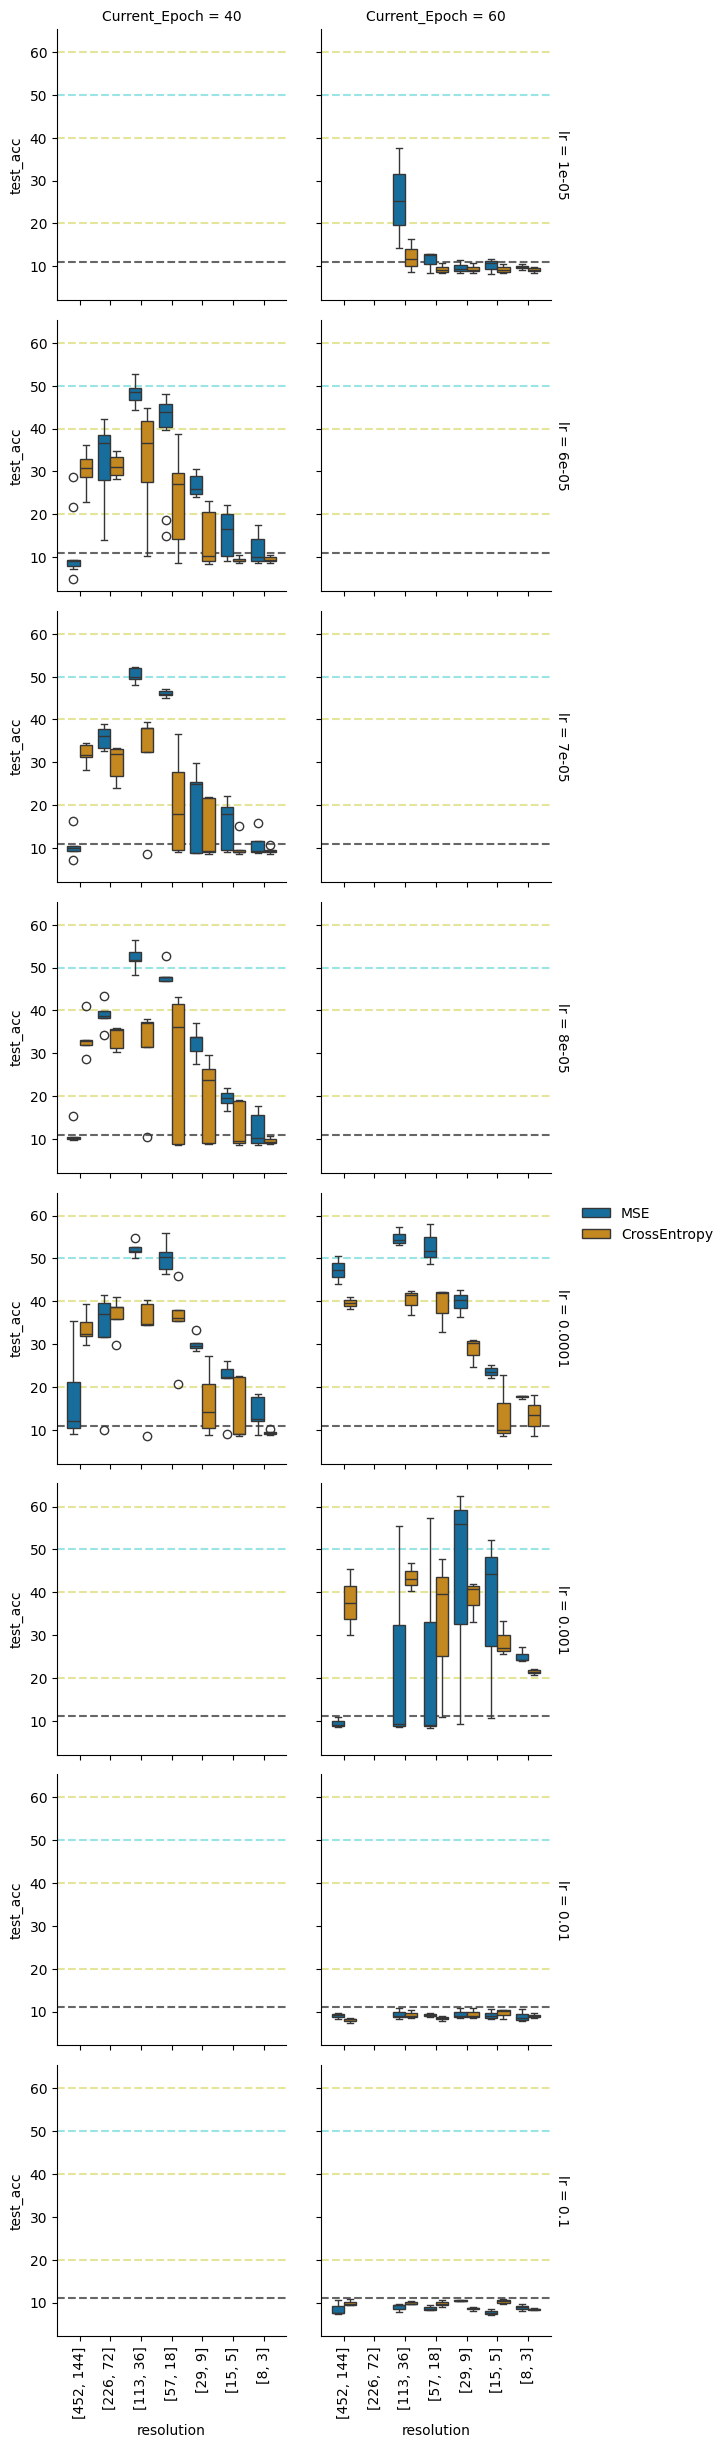

In [11]:

g= sns.FacetGrid(df_all_b_4c,col='Current_Epoch', row= "lr", margin_titles=True, legend_out=True)

g.map(sns.boxplot, "resolution", "test_acc", hue=df_all_b_4c["loss_fn"], order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

### 6c

In [12]:
file_path_b_6c3l_452144_1 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[452, 144]_2024-05-07.csv' 
file_path_b_6c3l_452144_2 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[452, 144]_2024-05-23.csv'
file_path_b_6c3l_452144_4 = r".././res_big_loop_saves/models/batch/6c3l/6c3l_[452, 144]_2024-05-20.csv"


file_path_b_6c3l_22672_1= r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[226, 72]_2024-05-07.csv' 
file_path_b_6c3l_22672_2 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[226, 72]_2024-05-30.csv'


file_path_b_6c3l_11336_1 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[113, 36]_2024-05-07.csv' 
file_path_b_6c3l_11336_2 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[113, 36]_2024-05-30.csv'


file_path_b_6c3l_5718_1 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[57, 18]_2024-05-07.csv' 
file_path_b_6c3l_5718_2 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[57, 18]_2024-05-30.csv'


file_path_b_6c3l_299_1 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[29, 9]_2024-05-07.csv' 
file_path_b_6c3l_299_2 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[29, 9]_2024-05-30.csv'


file_path_b_6c3l_155_1 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[15, 5]_2024-05-07.csv' 
file_path_b_6c3l_155_2 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[15, 5]_2024-05-30.csv'
file_path_b_6c3l_155_3 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[15, 5]_2024-06-03.csv'
file_path_b_6c3l_155_4 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[15, 5]_2024-06-05.csv'

file_path_b_6c3l_83_1 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[8, 3]_2024-05-07.csv' 
file_path_b_6c3l_83_2 = r'.././res_big_loop_saves/models/batch/6c3l/6c3l_[15, 5]_2024-06-03.csv'


df_b_6c3l_452144_1 = pd.read_csv(file_path_b_6c3l_452144_1)
df_b_6c3l_452144_2 = pd.read_csv(file_path_b_6c3l_452144_2)
df_b_6c3l_452144_4 = pd.read_csv(file_path_b_6c3l_452144_4)

df_b_6c3l_22672_1 = pd.read_csv(file_path_b_6c3l_22672_1)
df_b_6c3l_22672_2 = pd.read_csv(file_path_b_6c3l_22672_2)

df_b_6c3l_11336_1 = pd.read_csv(file_path_b_6c3l_11336_1)
df_b_6c3l_11336_2 = pd.read_csv(file_path_b_6c3l_11336_2)

df_b_6c3l_5718_1 = pd.read_csv(file_path_b_6c3l_5718_1)
df_b_6c3l_5718_2 = pd.read_csv(file_path_b_6c3l_5718_2)

df_b_6c3l_299_1 = pd.read_csv(file_path_b_6c3l_299_1)
df_b_6c3l_299_2 = pd.read_csv(file_path_b_6c3l_299_2)

df_b_6c3l_155_1 = pd.read_csv(file_path_b_6c3l_155_1)
df_b_6c3l_155_2 = pd.read_csv(file_path_b_6c3l_155_2)
df_b_6c3l_155_3 = pd.read_csv(file_path_b_6c3l_155_3)
df_b_6c3l_155_4 = pd.read_csv(file_path_b_6c3l_155_4)

df_b_6c3l_83_1 = pd.read_csv(file_path_b_6c3l_83_1)

#df_b_6c3l_83_2 = pd.read_csv(file_path_b_6c3l_83_2)



df_b_6c3l_452144 =  pd.concat([ df_b_6c3l_452144_1, df_b_6c3l_452144_2, df_b_6c3l_452144_4], ignore_index=True)
df_b_6c3l_22672 =  pd.concat([ df_b_6c3l_22672_1, df_b_6c3l_22672_2 ], ignore_index=True)
df_b_6c3l_11336 =  pd.concat([ df_b_6c3l_11336_1, df_b_6c3l_11336_2], ignore_index=True)
df_b_6c3l_5718 =  pd.concat([ df_b_6c3l_5718_1, df_b_6c3l_5718_2], ignore_index=True)
df_b_6c3l_299 = pd.concat([ df_b_6c3l_299_1, df_b_6c3l_299_2], ignore_index=True)
df_b_6c3l_155 =  pd.concat([ df_b_6c3l_155_1, df_b_6c3l_155_2, df_b_6c3l_155_3, df_b_6c3l_155_4], ignore_index=True)
df_b_6c3l_83 = df_b_6c3l_83_1

In [13]:
fir_6c3l = pd.concat([df_b_6c3l_452144, df_b_6c3l_22672, df_b_6c3l_11336, df_b_6c3l_5718, df_b_6c3l_299, df_b_6c3l_155, df_b_6c3l_83], ignore_index=True)
# remove wd and ched vals
df_all_b_6c = fir_6c3l[(fir_6c3l['wd']==0)&(fir_6c3l['scheduler value']==0)&(fir_6c3l['Current_Epoch']!= 1)]


/its/home/nn268/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


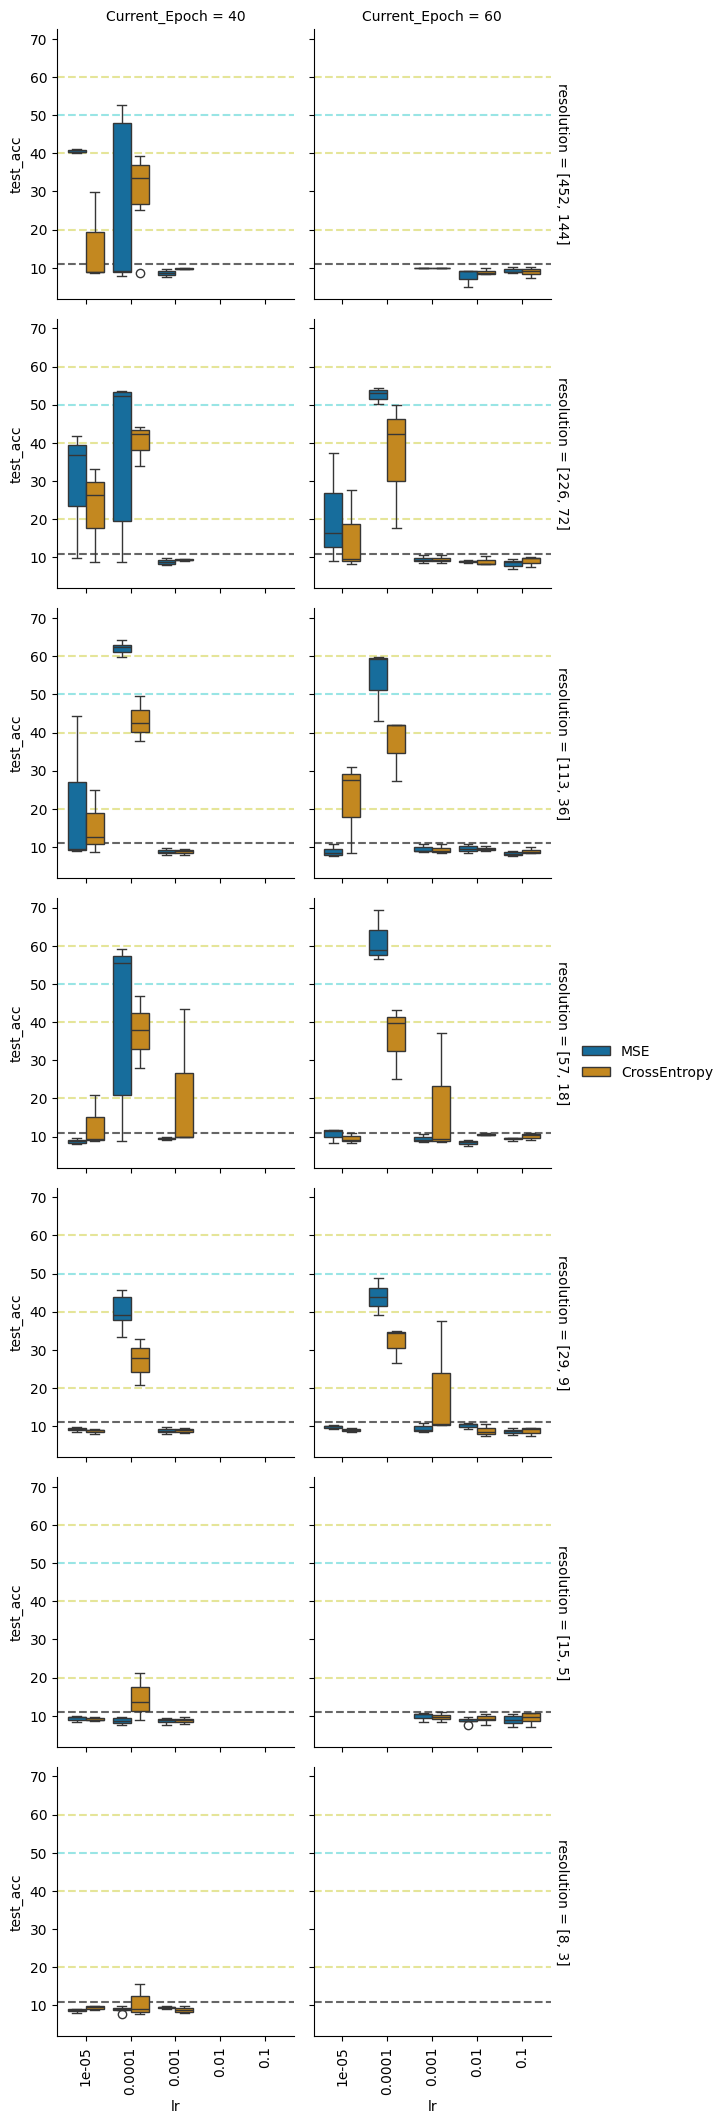

In [14]:

g= sns.FacetGrid(df_all_b_6c,col='Current_Epoch', row= "resolution", margin_titles=True, legend_out=True)

g.map(sns.boxplot, "lr", "test_acc", hue=df_all_b_6c["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

/its/home/nn268/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


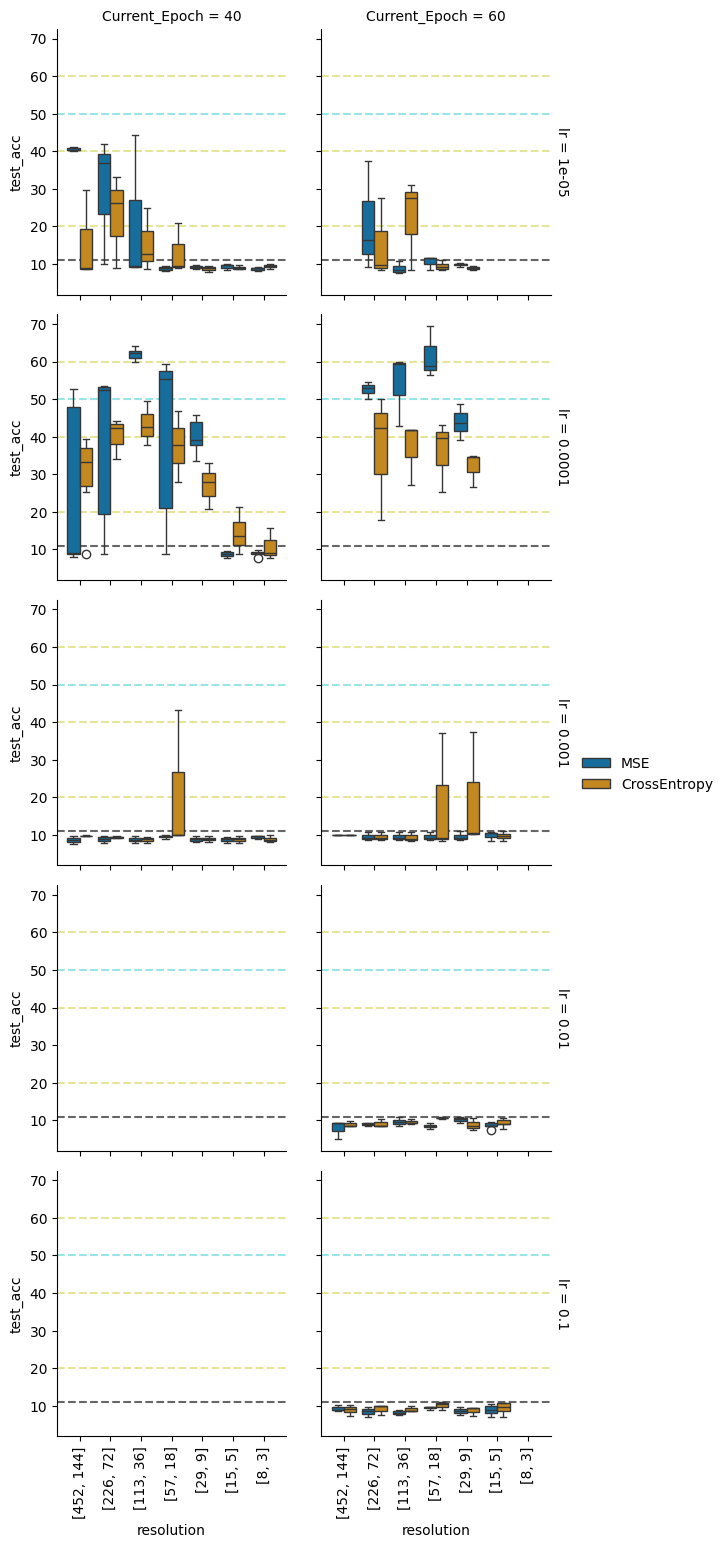

In [15]:

g= sns.FacetGrid(df_all_b_6c,col='Current_Epoch', row= "lr", margin_titles=True, legend_out=True)

g.map(sns.boxplot, "resolution", "test_acc", hue=df_all_b_6c["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

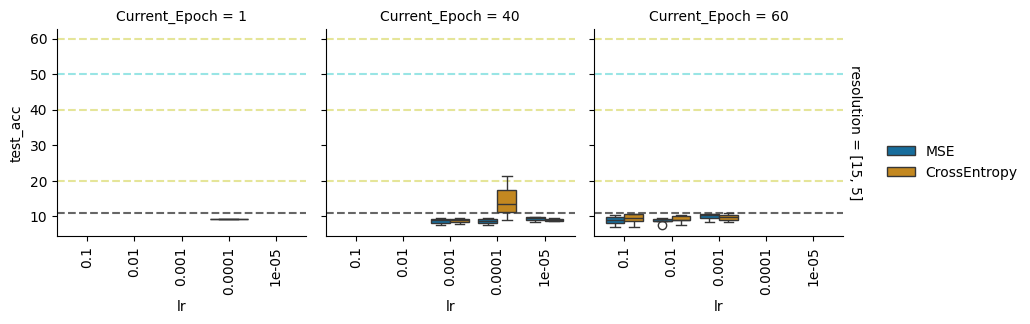

In [16]:

g= sns.FacetGrid(df_b_6c3l_155,col='Current_Epoch', row= "resolution", margin_titles=True, legend_out=True)

g.map(sns.boxplot, "lr", "test_acc", order = [1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05],hue=df_b_6c3l_155["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

In [17]:
print(np.unique(df_b_6c3l_155_1['lr']), np.unique(df_b_6c3l_155_1['Current_Epoch']))

print(np.unique(df_b_6c3l_155_2['lr']), np.unique(df_b_6c3l_155_2['Current_Epoch']))

print(np.unique(df_b_6c3l_155['lr']), np.unique(df_b_6c3l_155['Current_Epoch']))

[1.e-05 1.e-04 1.e-03] [ 1 40]
[0.001 0.01  0.1  ] [60]
[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01] [ 1 40 60]


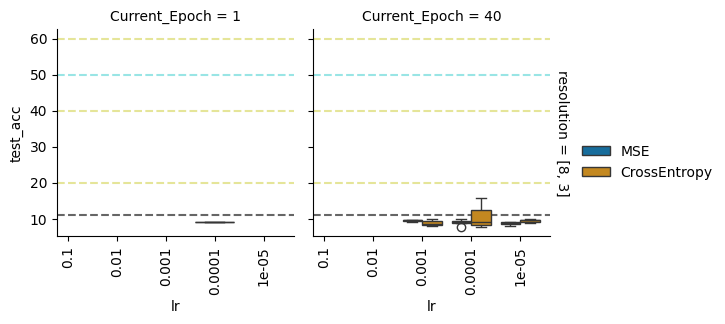

In [18]:

g= sns.FacetGrid(df_b_6c3l_83,col='Current_Epoch', row= "resolution", margin_titles=True, legend_out=True)

g.map(sns.boxplot, "lr", "test_acc", order = [1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05],hue=df_b_6c3l_83["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

In [19]:
#df_all_b_6c[(df_all_b_6c['Current_Epoch']==60)&(df_all_b_6c['resolution'] =='[452, 144]')]

In [20]:
#print(df_all_b_6c[(df_all_b_6c['model_name']=='6c3l')&(df_all_b_6c['resolution']== '[452, 144]')& (df_all_b_6c['lr']== 1e-5)&(df_all_b_6c['wd']==0)&(df_all_b_6c['scheduler value']==0)]) #&(df_all_b_6c['Current_Epoch'] == 60)

In [21]:
fir_6c3l[fir_6c3l.index.duplicated()] #0.0001 

,Date,gitHASH,model_name,loss_fn,lr,wd,scheduler value,seed,resolution,pad,...,v_accuracy_list,t_loss_list,v_loss_list,t_labels,v_labels,t_predict_list,v_predict_list,test_acc,test_predict,test_labels


In [22]:
list(df_all_b_6c)

['Date',
 'gitHASH',
 'model_name',
 'loss_fn',
 'lr',
 'wd',
 'scheduler value',
 'seed',
 'resolution',
 'pad',
 'lin_lay',
 'run time',
 'Run',
 'Current_Epoch',
 'save_location',
 'training_samples',
 'validation_samples',
 't_accuracy_list',
 'v_accuracy_list',
 't_loss_list',
 'v_loss_list',
 't_labels',
 'v_labels',
 't_predict_list',
 'v_predict_list',
 'test_acc',
 'test_predict',
 'test_labels']

In [23]:
print(np.unique(df_all_b_6c['lr']))

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


In [24]:
len(df_all_b_6c['Current_Epoch'])

319

In [25]:
df_all_b_6c[(df_all_b_6c['resolution']== '[452, 144]')]

,Date,gitHASH,model_name,loss_fn,lr,wd,scheduler value,seed,resolution,pad,...,v_accuracy_list,t_loss_list,v_loss_list,t_labels,v_labels,t_predict_list,v_predict_list,test_acc,test_predict,test_labels
9,2024-05-07,61b4b3b95161713120fb2ad124ac84d3b1acd48d,6c3l,MSE,0.00010,0,0,8,"[452, 144]",5,...,"[9.943181818181818, 9.517045454545455, 9.94318...","[4.298745431005955, 4.296678215265274, 4.29745...","[1.8176990747451782, 1.8172796443104744, 1.817...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",48.828125,"[2, 9, 9, 2, 7, 1, 9, 2, 8, 7, 6, 10, 8, 3, 1,...","[3, 1, 2, 2, 7, 1, 3, 9, 8, 7, 6, 6, 10, 10, 1..."
10,2024-05-07,61b4b3b95161713120fb2ad124ac84d3b1acd48d,6c3l,MSE,0.00010,0,0,2,"[452, 144]",5,...,"[9.801136363636363, 9.232954545454545, 8.66477...","[4.3011066019535065, 4.296689860522747, 4.2969...","[1.817768581211567, 1.8186137080192566, 1.8179...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.691406,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[7, 2, 7, 1, 10, 9, 1, 6, 5, 1, 3, 3, 4, 0, 8,..."
11,2024-05-07,61b4b3b95161713120fb2ad124ac84d3b1acd48d,6c3l,MSE,0.00010,0,0,3,"[452, 144]",5,...,"[11.505681818181818, 10.369318181818182, 10.51...","[4.298813655972481, 4.296438984572887, 4.29534...","[1.8175718411803246, 1.8176994994282722, 1.817...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",52.734375,"[1, 6, 2, 7, 2, 8, 9, 2, 0, 9, 6, 1, 9, 4, 6, ...","[1, 6, 2, 7, 2, 8, 10, 0, 0, 9, 6, 6, 0, 4, 6,..."
12,2024-05-07,61b4b3b95161713120fb2ad124ac84d3b1acd48d,6c3l,MSE,0.00010,0,0,8,"[452, 144]",5,...,"[8.664772727272728, 8.522727272727272, 8.23863...","[4.2994729205966, 4.297237895429134, 4.2968474...","[1.8189414739608765, 1.8188347518444061, 1.818...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.765625,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[4, 10, 1, 0, 8, 4, 0, 1, 4, 3, 1, 9, 0, 9, 1,..."
13,2024-05-07,61b4b3b95161713120fb2ad124ac84d3b1acd48d,6c3l,CrossEntropy,0.00010,0,0,8,"[452, 144]",5,...,"[9.517045454545455, 9.090909090909092, 8.66477...","[124.68932294845581, 124.652028799057, 124.616...","[52.74121952056885, 52.73513340950012, 52.7183...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",37.597656,"[0, 2, 3, 3, 6, 10, 2, 3, 3, 2, 10, 7, 7, 6, 2...","[5, 3, 3, 1, 9, 8, 2, 0, 3, 2, 3, 7, 9, 7, 10,..."
14,2024-05-07,61b4b3b95161713120fb2ad124ac84d3b1acd48d,6c3l,MSE,0.00010,0,0,2,"[452, 144]",5,...,"[8.806818181818182, 10.227272727272728, 9.6590...","[4.299908101558685, 4.297164738178253, 4.29584...","[1.8178937062621117, 1.8188553750514984, 1.818...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.789062,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2, 1, 10, 4, 4, 5, 4, 9, 10, 2, 7, 2, 6, 2, 2..."
15,2024-05-07,61b4b3b95161713120fb2ad124ac84d3b1acd48d,6c3l,CrossEntropy,0.00010,0,0,2,"[452, 144]",5,...,"[9.517045454545455, 8.522727272727272, 8.23863...","[124.6188702583313, 124.61536073684692, 124.53...","[52.7360680103302, 52.75989818572998, 52.77486...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.

### 7c

In [26]:
file_path_b_7c3l_452144 = r'.././res_big_loop_saves/models/batch/7c3l/7c3l_[452, 144]_2024-04-30.csv'
file_path_b_7c3l_22672 = r'.././res_big_loop_saves/models/batch/7c3l/7c3l_[226, 72]_2024-04-30.csv'
file_path_b_7c3l_11336 = r'.././res_big_loop_saves/models/batch/7c3l/7c3l_[113, 36]_2024-04-30.csv'

file_path_b_7c3l_5718_1 = r'.././res_big_loop_saves/models/batch/7c3l/7c3l_[57, 18]_2024-04-30.csv'
file_path_b_7c3l_5718_2 =r".././res_big_loop_saves/models/batch/7c3l/7c3l_[57, 18]_2024-06-03.csv"

file_path_b_7c3l_299_1 = r'.././res_big_loop_saves/models/batch/7c3l/7c3l_[29, 9]_2024-05-03.csv'
file_path_b_7c3l_299_2 = r'.././res_big_loop_saves/models/batch/7c3l/7c3l_[29, 9]_2024-06-03.csv'

file_path_b_7c3l_155 = r'.././res_big_loop_saves/models/batch/7c3l/7c3l_[15, 5]_2024-05-03.csv'
file_path_b_7c3l_83 = r'.././res_big_loop_saves/models/batch/7c3l/7c3l_[8, 3]_2024-05-03.csv'

df_b_7c3l_452144 = pd.read_csv(file_path_b_7c3l_452144)
df_b_7c3l_22672 = pd.read_csv(file_path_b_7c3l_22672)
df_b_7c3l_11336 = pd.read_csv(file_path_b_7c3l_11336)

df_b_7c3l_5718_1 = pd.read_csv(file_path_b_7c3l_5718_1)
df_b_7c3l_5718_2 = pd.read_csv(file_path_b_7c3l_5718_2)
df_b_7c3l_5718 = pd.concat([df_b_7c3l_5718_1, df_b_7c3l_5718_2], ignore_index=True)

df_b_7c3l_299_1 = pd.read_csv(file_path_b_7c3l_299_1)
df_b_7c3l_299_2 = pd.read_csv(file_path_b_7c3l_299_2)
df_b_7c3l_299 = pd.concat([df_b_7c3l_299_1, df_b_7c3l_299_2], ignore_index=True)

df_b_7c3l_155 = pd.read_csv(file_path_b_7c3l_155)
df_b_7c3l_83 = pd.read_csv(file_path_b_7c3l_83)

In [27]:
fir_7c3l = pd.concat([df_b_7c3l_452144, df_b_7c3l_22672, df_b_7c3l_11336, df_b_7c3l_5718, df_b_7c3l_299, df_b_7c3l_155, df_b_7c3l_83], ignore_index=True)
# remove wd and ched vals
df_all_b_7c = fir_7c3l[(fir_7c3l['wd']==0)&(fir_7c3l['scheduler value']==0)]


/its/home/nn268/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


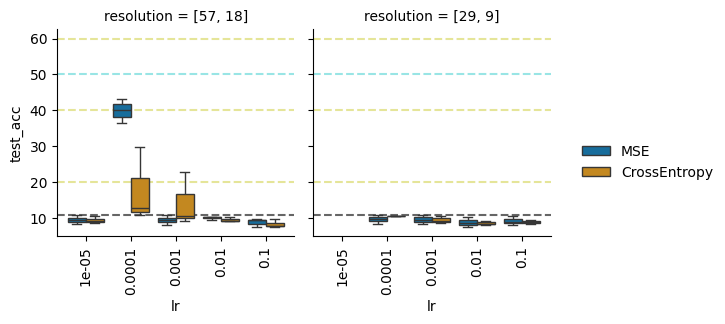

In [28]:
df_all_b_7c_60 = df_all_b_7c[(df_all_b_7c['Current_Epoch']==60)]

g= sns.FacetGrid(df_all_b_7c_60,col='resolution', margin_titles=True, legend_out=True)

g.map(sns.boxplot, "lr", "test_acc", hue=df_all_b_7c_60["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()
#g.figure.suptitle("7c res 57 18", y=1.05)

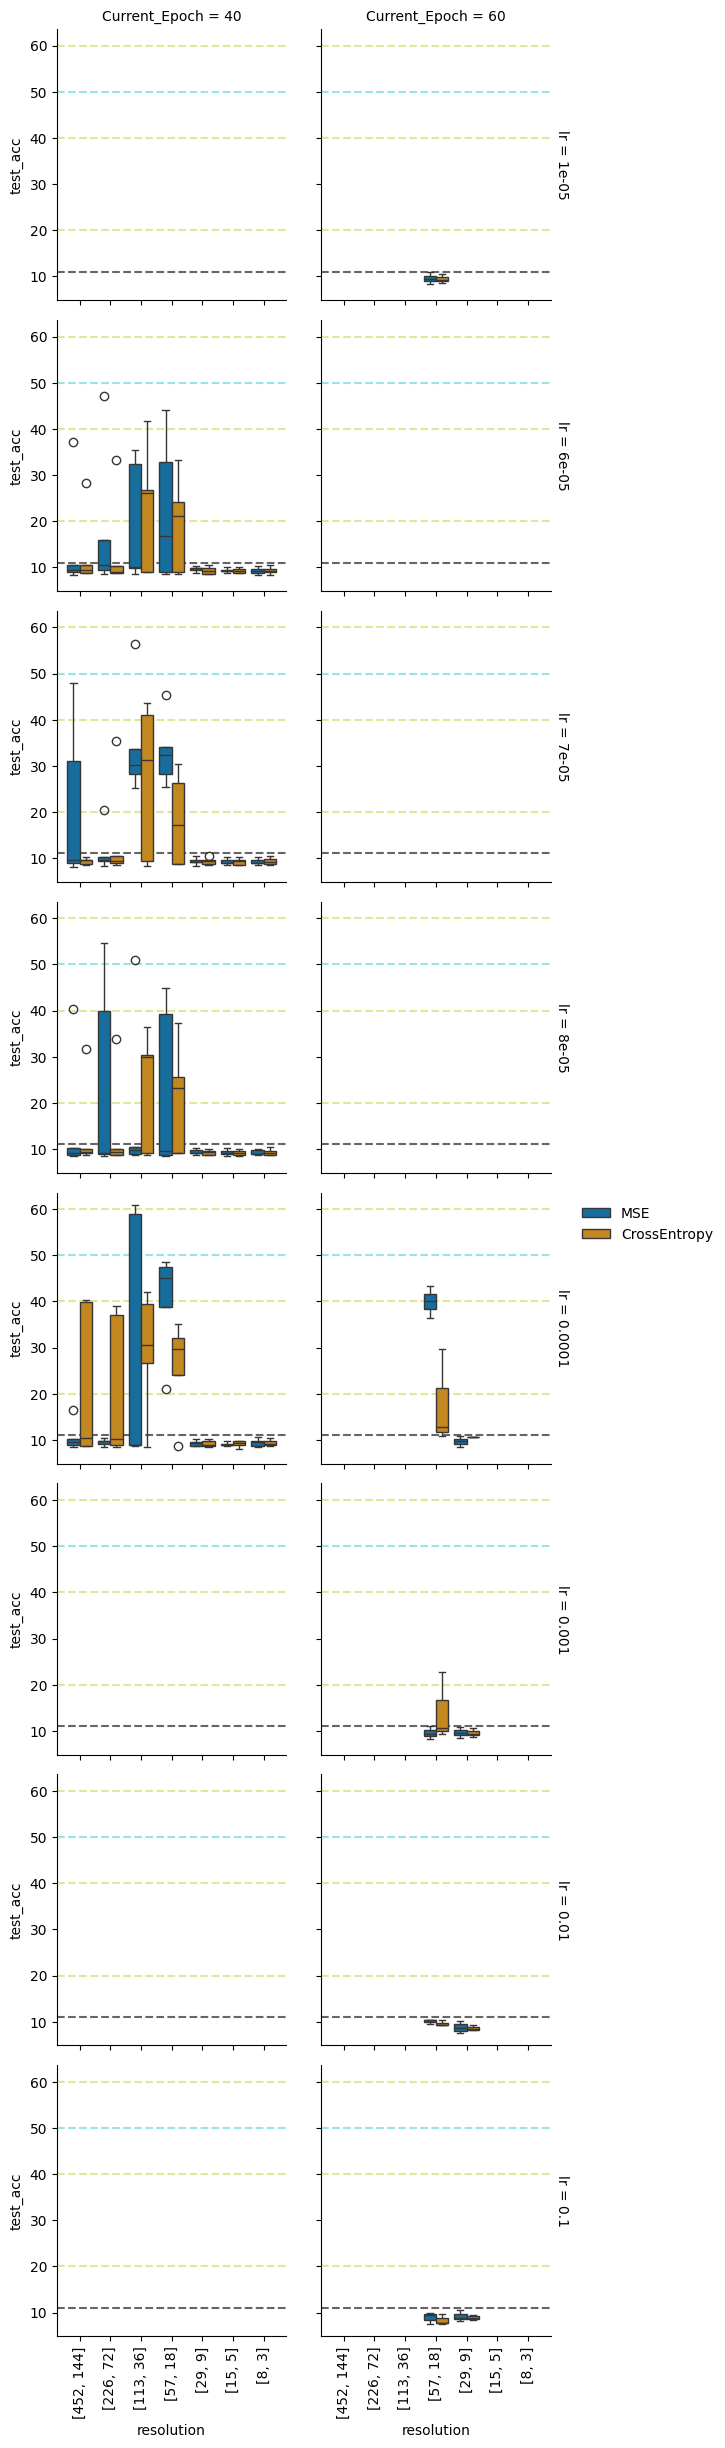

In [29]:

g= sns.FacetGrid(df_all_b_7c,col='Current_Epoch', row= "lr", margin_titles=True, legend_out=True)

g.map(sns.boxplot, "resolution", "test_acc",order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"], hue=df_all_b_7c["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

In [30]:
df_b_7c3l_5718_2

,Date,gitHASH,model_name,loss_fn,lr,wd,scheduler value,seed,resolution,pad,...,v_accuracy_list,t_loss_list,v_loss_list,t_labels,v_labels,t_predict_list,v_predict_list,test_acc,test_predict,test_labels
0,2024-06-03,d86ac0b281df66330854cade05a02009c9010f8b,7c3l,MSE,0.10000,0,0,8,"[57, 18]",1,...,"[9.517045454545455, 10.227272727272728, 10.511...","[4.21332748234272, 4.232954576611519, 4.252840...","[1.8039772808551788, 1.7954545468091965, 1.789...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.863281,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[6, 5, 2, 4, 3, 7, 7, 0, 9, 3, 2, 6, 5, 8, 1, ..."
1,2024-06-03,d86ac0b281df66330854cade05a02009c9010f8b,7c3l,CrossEntropy,0.10000,0,0,8,"[57, 18]",1,...,"[9.659090909090908, 9.801136363636363, 10.0852...","[63.81816649436951, 63.83779692649841, 63.8065...","[26.895317792892456, 26.895318269729614, 26.86...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.617188,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[2, 9, 7, 1, 9, 9, 10, 5, 2, 6, 8, 0, 7, 7, 6,..."
2,2024-06-03,d86ac0b281df66330854cade05a02009c9010f8b,7c3l,MSE,0.10000,0,0,2,"[57, 18]",1,...,"[9.801136363636363, 9.375, 9.801136363636363, ...","[4.210302487015724, 4.295454531908035, 4.30681...","[1.8011363744735718, 1.8096591085195541, 1.803...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...","[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.519531,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","[1, 7, 7, 1, 9, 9, 4, 2, 6, 8, 0, 4, 5, 2, 0, ..."
3,2024-06-03,d86ac0b281df66330854cade05a02009c9010f8b,7c3l,CrossEntropy,0.10000,0,0,2,"[57, 18]",1,...,"[10.369318181818182, 10.795454545454545, 10.93...","[63.84890341758728, 63.74405360221863, 63.7284...","[26.817195415496826, 26.770320653915405, 26.75...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.667969,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[2, 3, 2, 0, 1, 8, 8, 4, 5, 3, 8, 2, 1, 7, 10,..."
4,2024-06-03,d86ac0b281df66330854cade05a02009c9010f8b,7c3l,MSE,0.10000,0,0,6,"[57, 18]",1,...,"[6.8181818181818175, 7.528409090909091, 6.9602...","[4.221872091293335, 4.2784091383218765, 4.2897...","[1.8579545766115189, 1.8494318276643753, 1.857...","[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.375000,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[3, 3, 6, 2, 1, 0, 8, 1, 9, 1, 3, 1, 10, 5, 5,..."
5,2024-06-03,d86ac0b281df66330854cade05a02009c9010f8b,7c3l,CrossEntropy,0.10000,0,0,6,"[57, 18]",1,...,"[8.948863636363637, 8.522727272727272, 8.80681...","[63.72395086288452, 63.74405217170715, 63.7909...","[26.98906970024109, 27.004695653915405, 27.004...","[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.812500,"[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[9, 2, 10, 8, 9, 10, 5, 6, 0, 1, 3, 4, 5, 4, 4..."
6,2024-06-03,d86ac0b281df66330854cade05a02009c9010f8b,7c3l,MSE,0.01000,0,0,8,"[57, 18]",1,...,"[9.659090909090908, 10.085227272727272, 10.227...","[2.240334391593933, 2.1492161080241203, 2.1484...","[0.9081254974007607, 0.9083727598190308, 0.908...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1

### vgg

In [31]:
file_path_b_vgg_452144 = r'.././res_big_loop_saves/models/batch/vgg16/vgg16_[452, 144]_2024-05-07.csv' 
file_path_b_vgg_22672 = r'.././res_big_loop_saves/models/batch/vgg16/vgg16_[226, 72]_2024-05-07.csv' 
file_path_b_vgg_11336 = r'.././res_big_loop_saves/models/batch/vgg16/vgg16_[113, 36]_2024-05-07.csv' 
file_path_b_vgg_5718_1 = r'.././res_big_loop_saves/models/batch/vgg16/vgg16_[57, 18]_2024-05-07.csv' 
file_path_b_vgg_5718_2 = r'.././res_big_loop_saves/models/batch/vgg16/vgg16_[57, 18]_2024-06-03.csv' 

file_path_b_vgg_299 = r'.././res_big_loop_saves/models/batch/vgg16/vgg16_[29, 9]_2024-05-07.csv' 
file_path_b_vgg_155 = r'.././res_big_loop_saves/models/batch/vgg16/vgg16_[15, 5]_2024-05-07.csv' 


file_path_b_vgg_83 = r'.././res_big_loop_saves/models/batch/vgg16/vgg16_[8, 3]_2024-05-07.csv' 

df_b_vgg_452144 = pd.read_csv(file_path_b_vgg_452144)
df_b_vgg_22672 = pd.read_csv(file_path_b_vgg_22672)
df_b_vgg_11336 = pd.read_csv(file_path_b_vgg_11336)
df_b_vgg_5718_1 = pd.read_csv(file_path_b_vgg_5718_1)
df_b_vgg_5718_2 = pd.read_csv(file_path_b_vgg_5718_2)
df_b_vgg_5718 = pd.concat([df_b_vgg_5718_1, df_b_vgg_5718_2], ignore_index=True)

df_b_vgg_299 = pd.read_csv(file_path_b_vgg_299)
df_b_vgg_155 = pd.read_csv(file_path_b_vgg_155)
df_b_vgg_83 = pd.read_csv(file_path_b_vgg_83)

In [32]:
fir_vgg= pd.concat([df_b_vgg_452144, df_b_vgg_22672, df_b_vgg_11336, df_b_vgg_5718, df_b_vgg_299, df_b_vgg_155, df_b_vgg_83], ignore_index=True)
# remove wd and ched vals
df_all_b_vg = fir_vgg[(fir_vgg['wd']==0)&(fir_vgg['scheduler value']==0)&(fir_vgg['Current_Epoch']!=30)]


/its/home/nn268/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


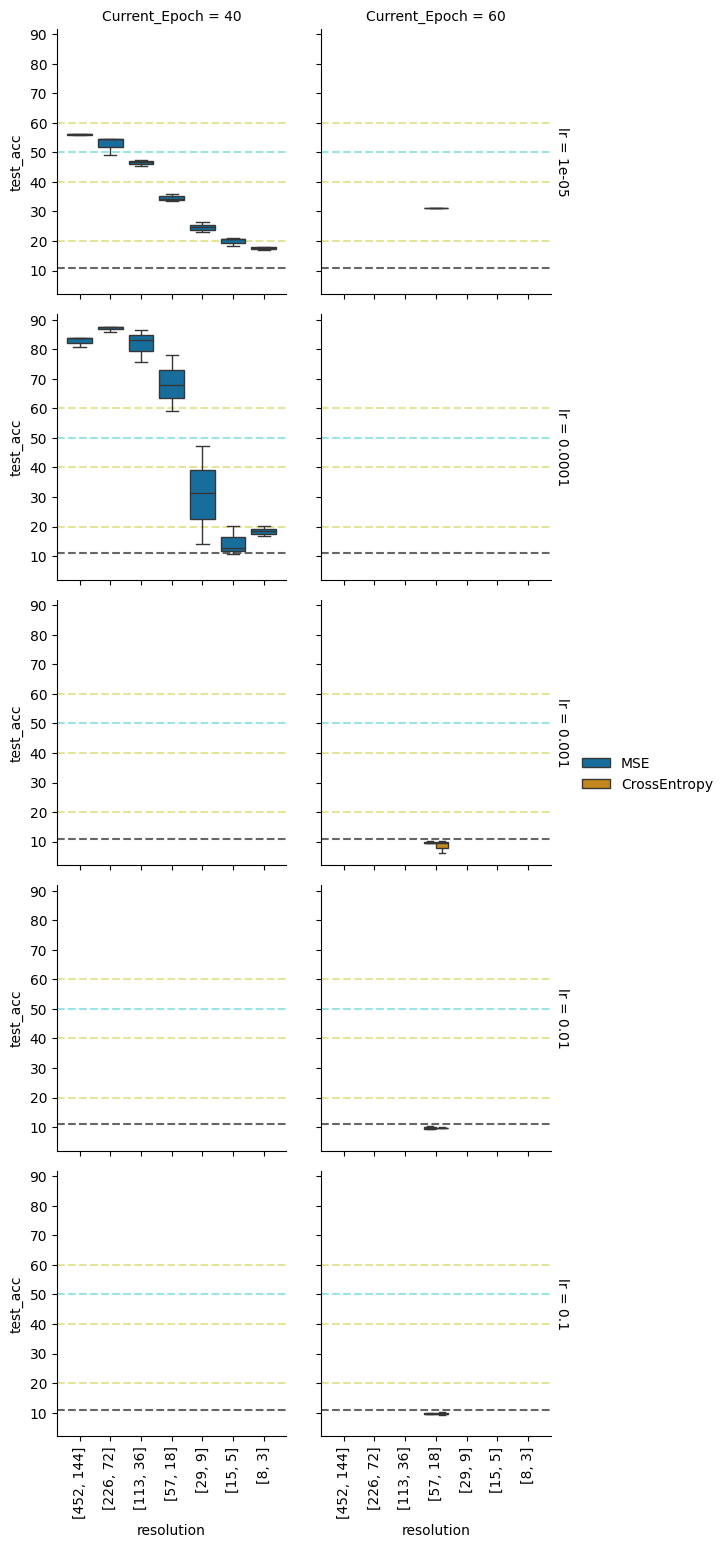

In [33]:

g= sns.FacetGrid(df_all_b_vg,col='Current_Epoch', row= "lr", margin_titles=True, legend_out=True)

g.map(sns.boxplot, "resolution", "test_acc", hue=df_all_b_vg["loss_fn"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

## All

In [35]:
df_b_all = pd.concat([df_all_b_2c, df_all_b_3c, df_all_b_4c, df_all_b_6c, df_all_b_7c, df_all_b_vg], ignore_index=True)

In [34]:
df_b_all[(df_b_all['model_name']=='6c3l')&(df_b_all['Current_Epoch']==60)&(df_b_all['resolution'] =='[452, 144]')&(df_b_all['lr']== 1e-4)]

NameError: name 'df_b_all' is not defined

In [ ]:
print(np.unique(df_b_all['lr']))

In [ ]:
print(df_b_all[(df_b_all['model_name']=='6c3l')&(df_b_all['resolution']== '[452, 144]')& (df_b_all['lr']== 0.0001)]) #

In [ ]:
df_b_all[df_b_all.index.duplicated()]

In [ ]:
df_b_all = df_b_all.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

In [ ]:
df_b_all

In [ ]:
df_b_all[df_b_all.index.duplicated()] #0.0001


## plots

In [ ]:
print(df_b_all[(df_b_all['model_name']=='6c3l')&(df_b_all['resolution']== '[452, 144]')& (df_b_all['lr']== 1e-5)&(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)]) #df_all_B_sameparams_60df_b_all

In [ ]:
print(df_all_B_sameparams_60[(df_all_B_sameparams_60['model_name']=='6c3l')&(df_all_B_sameparams_60['resolution']== '[452, 144]')& (df_all_B_sameparams_60['lr']== 1e-5)&(df_all_B_sameparams_60['wd']==0)&(df_all_B_sameparams_60['scheduler value']==0)]) #df_all_B_sameparams_60df_b_alldf_all_B_sameparams_60

In [ ]:
# 60 epochs
# box

df_all_B_sameparams_60 = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)]
df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1e-04,0.0001, 1.00e-05, 0.00001]))]


g= sns.FacetGrid(df_all_B_sameparams_60_log, row='lr', col='resolution',col_order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],margin_titles=True, legend_out=True)

g.map(sns.boxplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_log["loss_fn"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("B_60Epochs_bioxplot")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle("B_60Epochs_bioxplot", y=1.05)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
# 60 epochs

df_all_B_sameparams_60 = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)]
df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_log, row='lr', col='resolution',col_order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_log["loss_fn"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("B_60Epochs_barplot")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle("B_60Epochs_barplot", y=1.05)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
# 60 epochs

df_all_B_sameparams_60 = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)]
df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_log, row='lr', col='model_name',col_order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"],margin_titles=True, legend_out=True)

g.map(sns.barplot, "resolution", "test_acc", hue=df_all_B_sameparams_60_log["loss_fn"], order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("B_60Epochs_barplot")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle("B_60Epochs_barplot", y=1.05)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
print(np.unique(df_all_B_sameparams_60_log['lr']))

In [ ]:
# 60 epochs

df_all_B_sameparams_60_2 = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)]
df_all_B_sameparams_60_log_2 = df_all_B_sameparams_60_log_2[(df_all_B_sameparams_60_log_2['loss_fn']=='MSE')]


g= sns.FacetGrid(df_all_B_sameparams_60_log_2, row='lr', col='resolution',col_order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_log_2["model_name"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("B_60Epochs_barplot")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle("B_60Epochs_barplot", y=1.05)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
# 40 epochs
# BOX

df_all_B_sameparams_40 = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==40)]
df_all_B_sameparams_40_log = df_all_B_sameparams_40[(df_all_B_sameparams_40['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_40_log, row='lr', col='resolution',col_order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],margin_titles=True, legend_out=True)

g.map(sns.boxplot, "model_name", "test_acc", hue=df_all_B_sameparams_40_log["loss_fn"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("B_40Epochs_bioxplot")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle("B_40Epochs_bioxplot", y=1.05)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
# 40 epochs
# BAR

df_all_B_sameparams_40 = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==40)]
df_all_B_sameparams_40_log = df_all_B_sameparams_40[(df_all_B_sameparams_40['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_40_log, row='lr', col='resolution',col_order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_40_log["loss_fn"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("B_40Epochs_barplot")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle("B_40Epochs_barplot", y=1.05)
plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



## Ben suggestion graphs

choose one lr

res along the x
test acc on y

try:
model by row

Text(0.5, 1.09, 'Model Test Accuracy for different image Resolutions.')

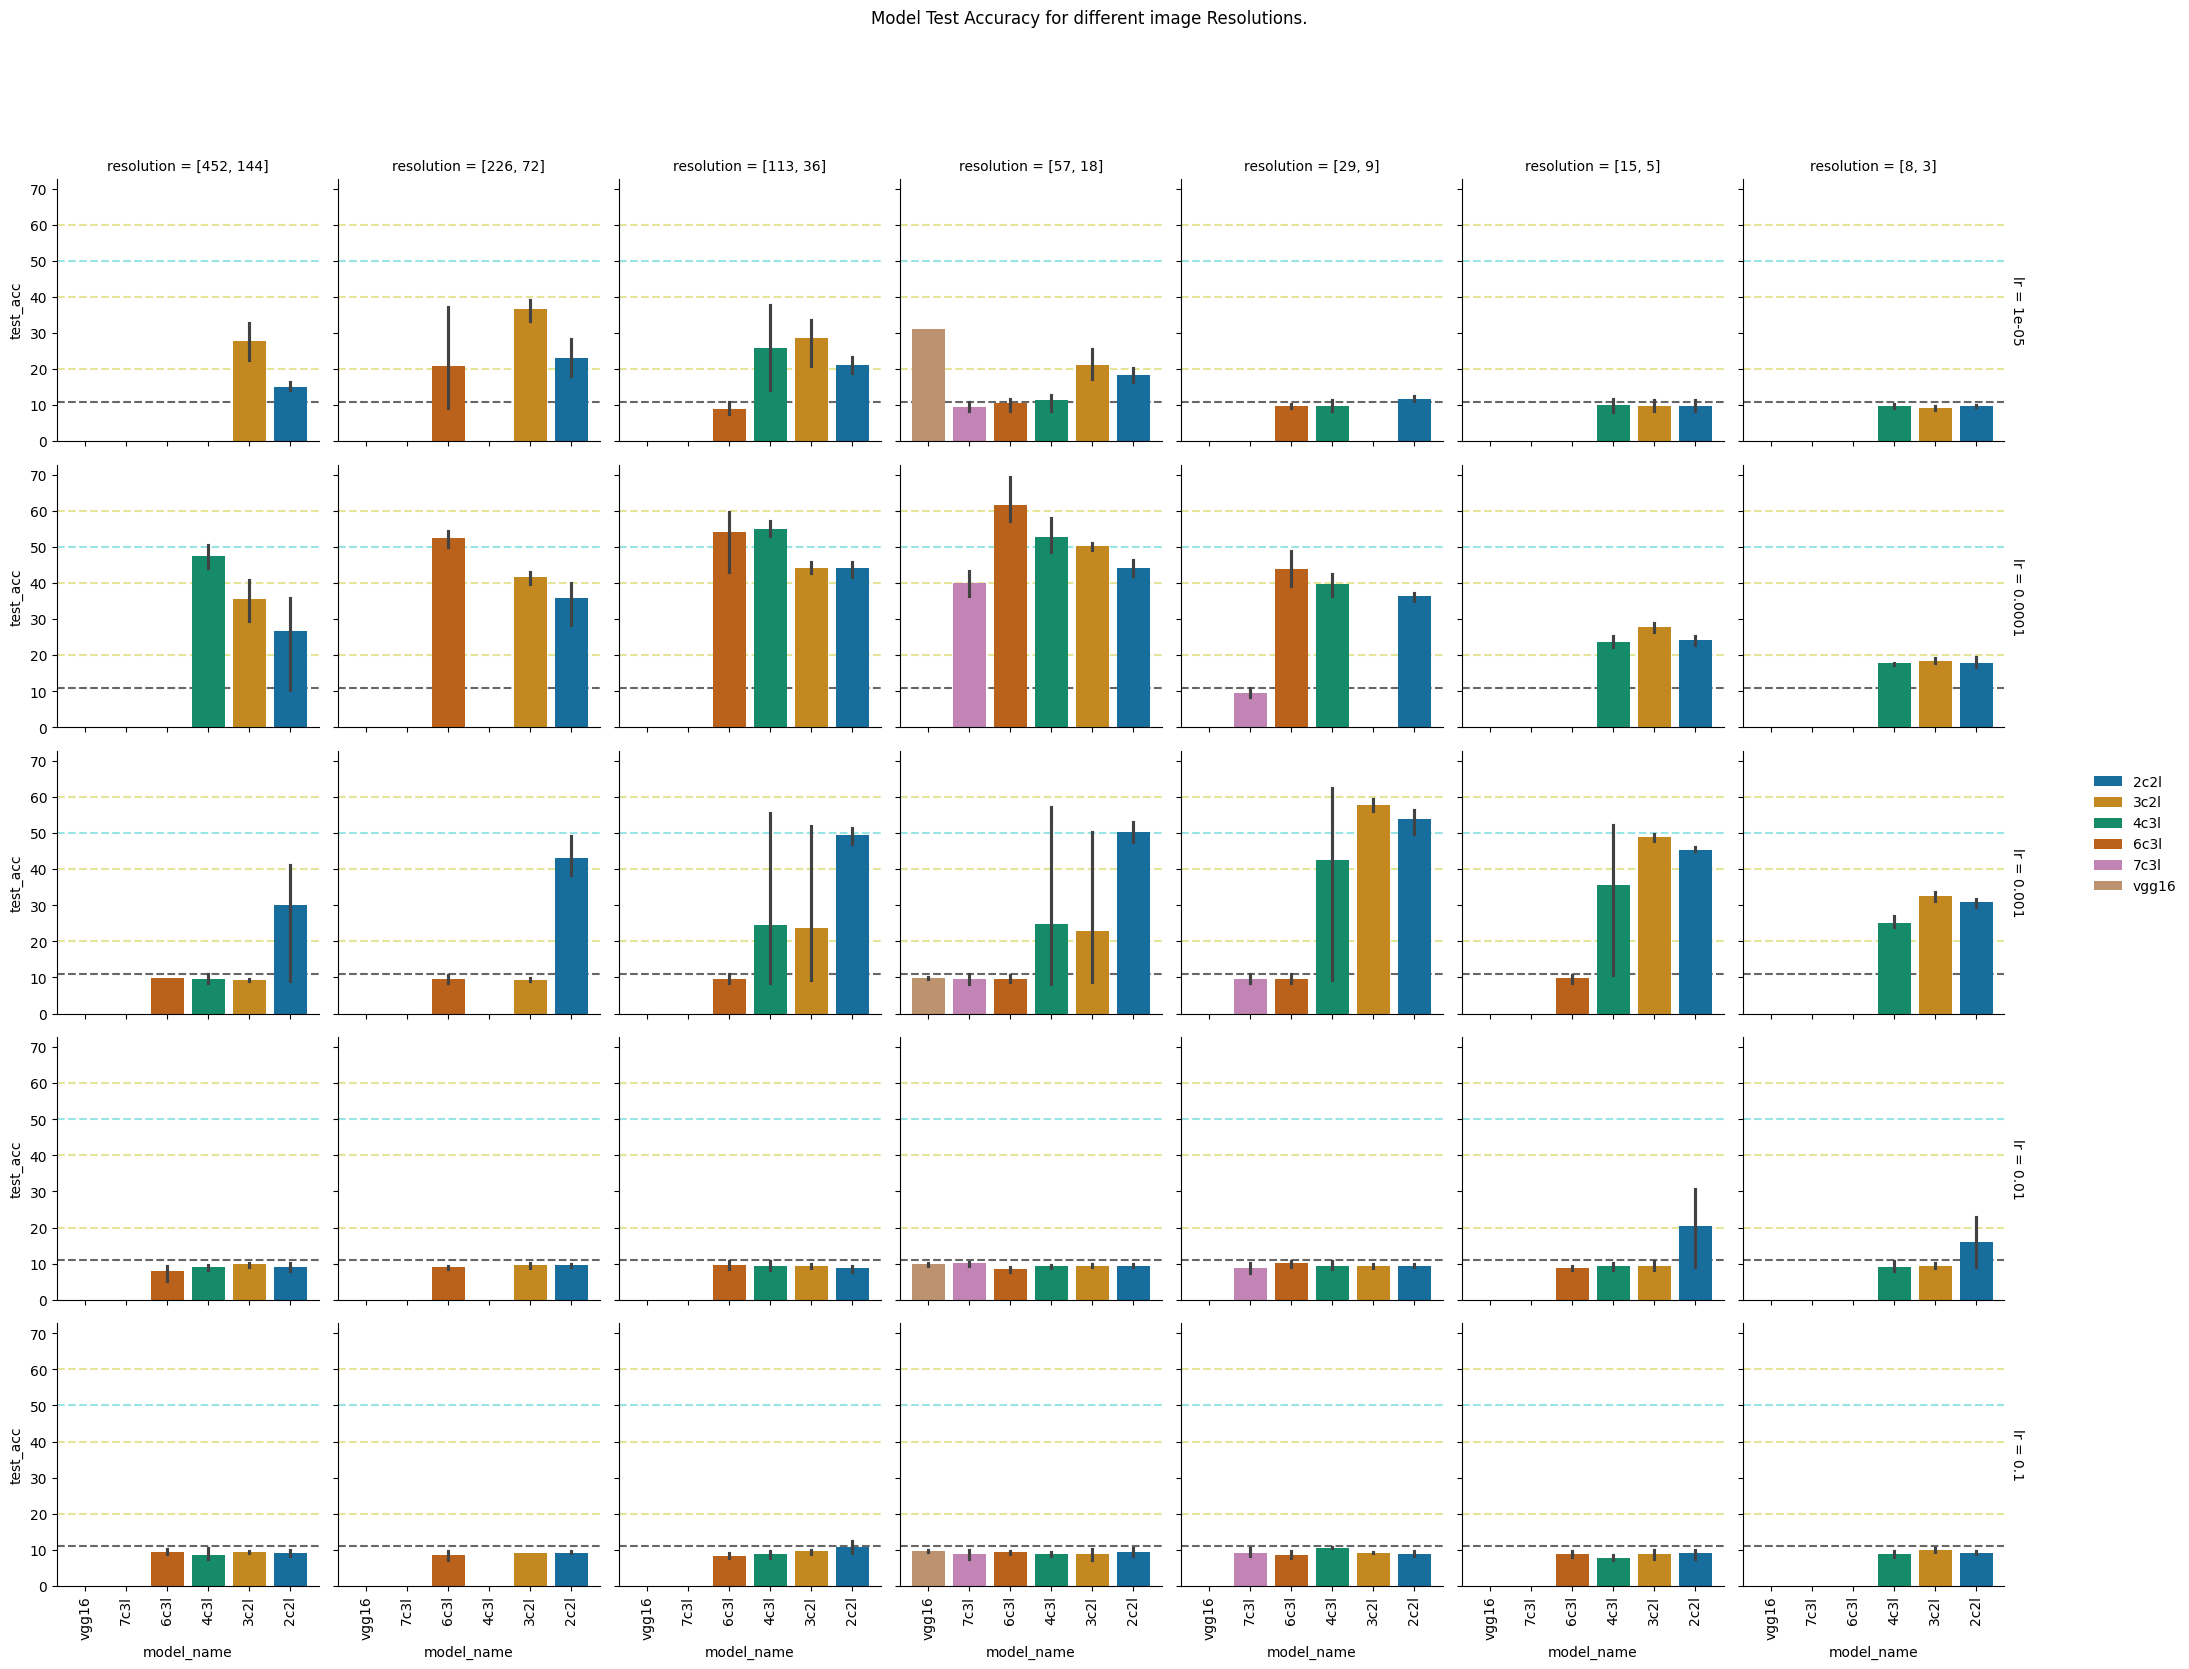

In [36]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)&(df_b_all['loss_fn']=='MSE')]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, col='resolution',col_order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],row="lr",margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_fewlr["model_name"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for different image Resolutions.")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



Text(0.5, 1.09, 'Model Test Accuracy for different image Resolutions.')

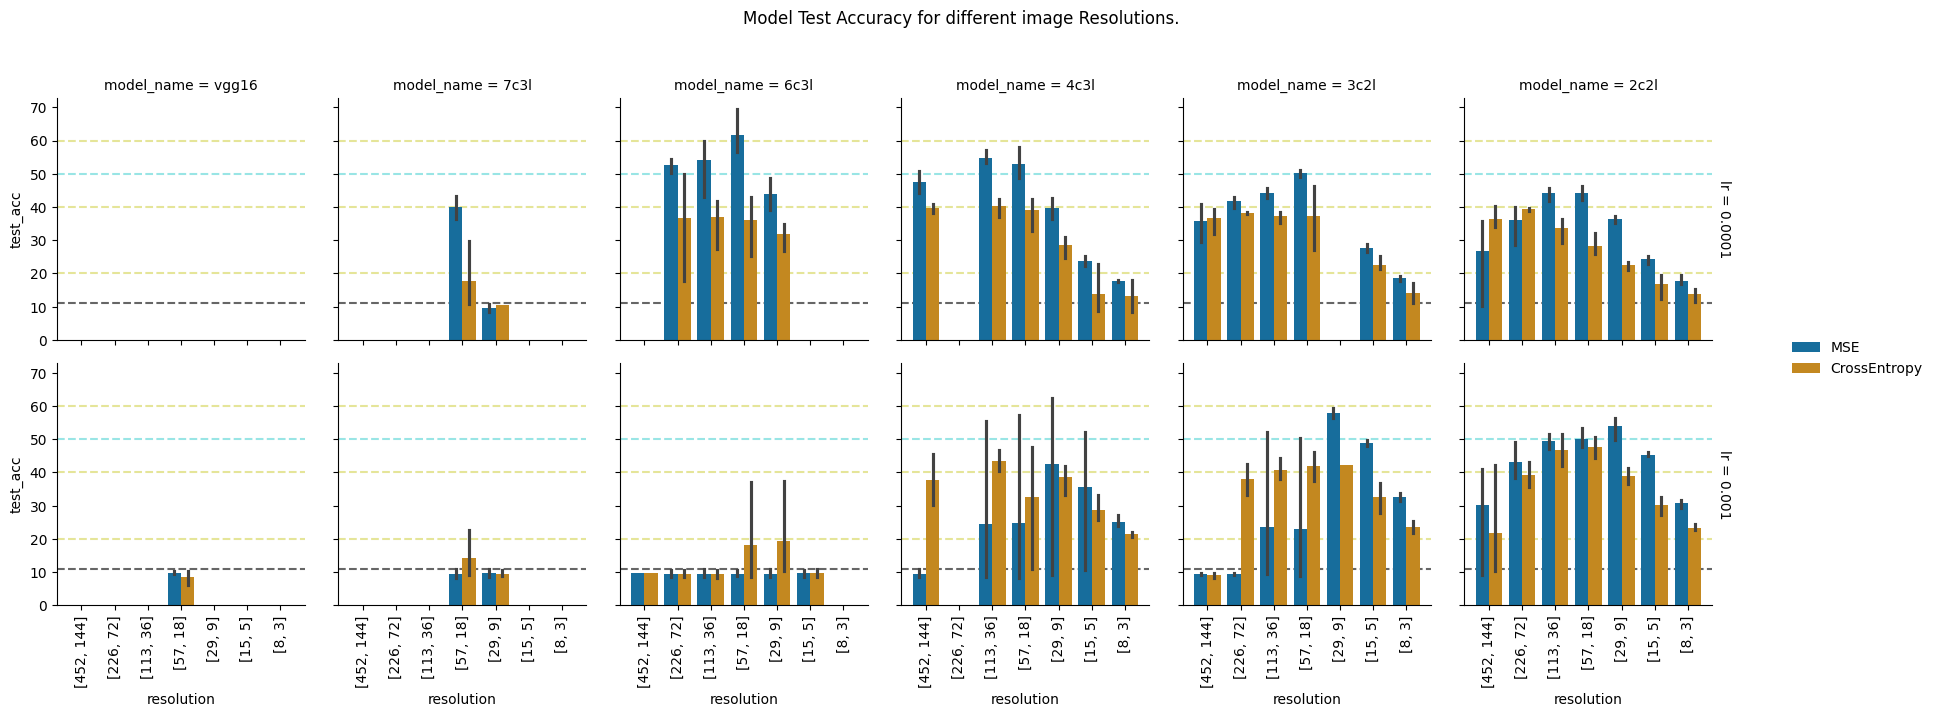

In [37]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)&(df_b_all['lr'].isin([0.001, 0.0001]))]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, col='model_name',col_order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"],row="lr",margin_titles=True, legend_out=True)

g.map(sns.barplot, "resolution", "test_acc", hue=df_all_B_sameparams_60_fewlr["loss_fn"], order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for different image Resolutions.")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



Text(0.5, 1.09, 'Model Test Accuracy for different image Resolutions.')

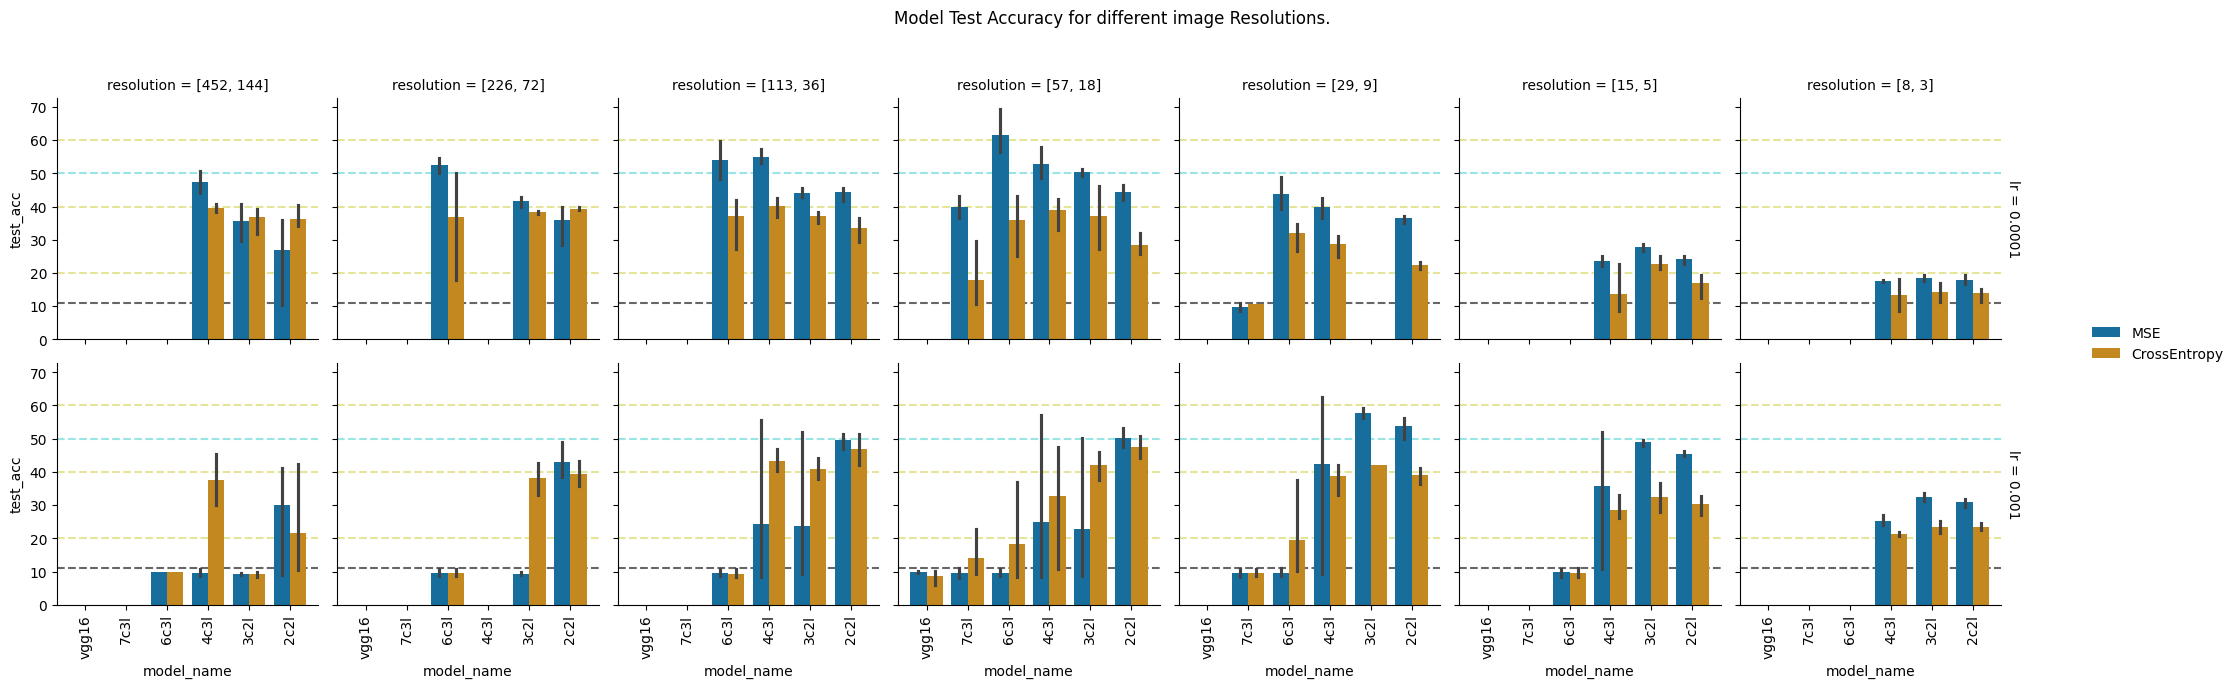

In [38]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)&(df_b_all['lr'].isin([0.001, 0.0001]))]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, col='resolution',col_order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],row="lr",margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_fewlr["loss_fn"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for different image Resolutions.")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



Text(0.5, 1.09, 'Model Test Accuracy for different image Resolutions.')

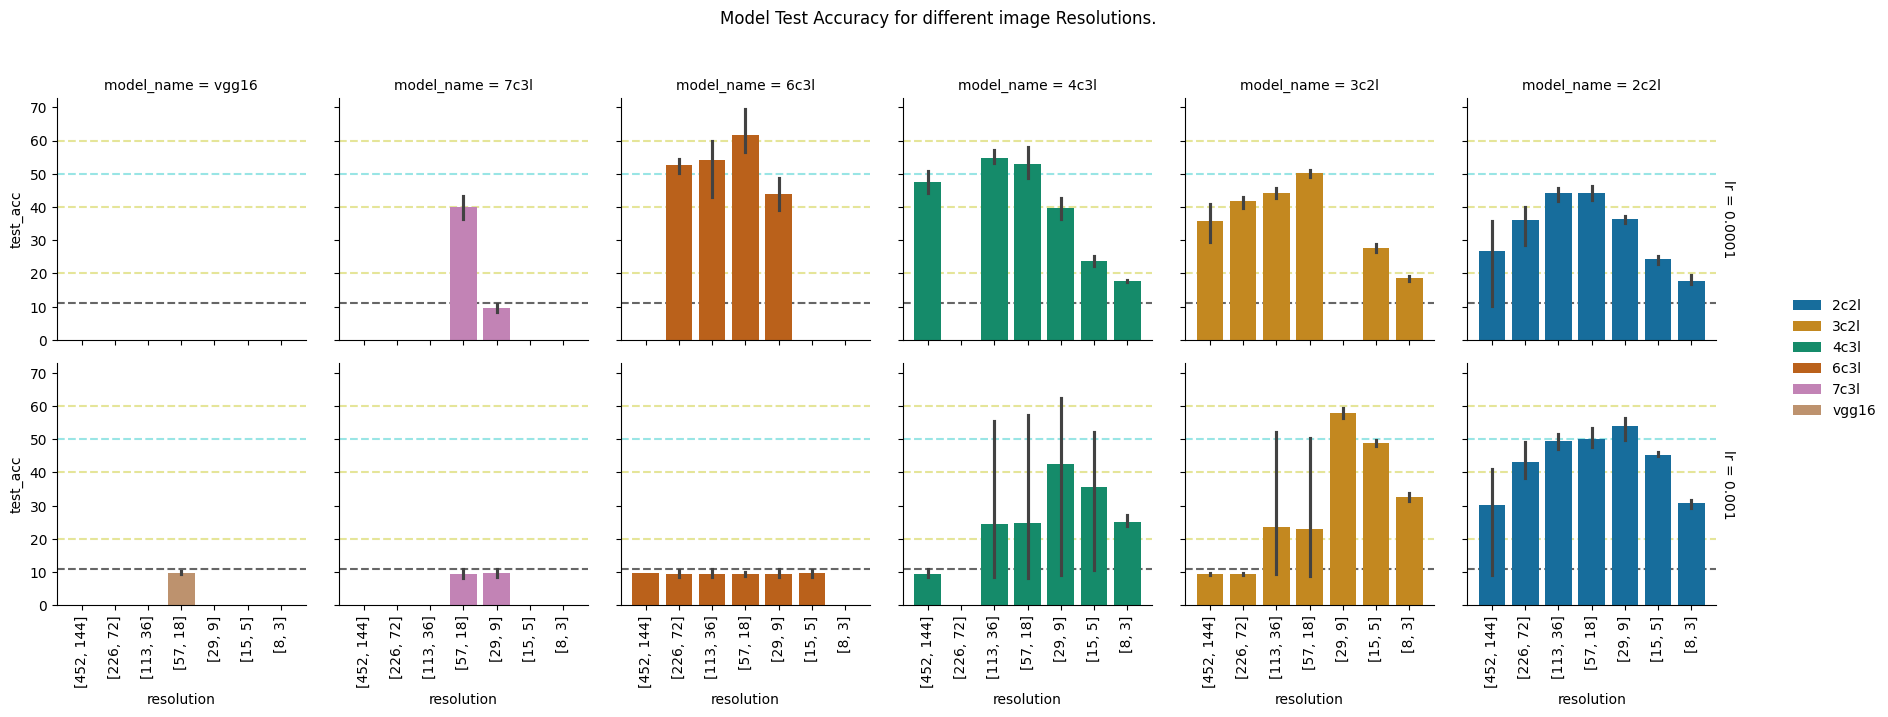

In [39]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)&(df_b_all['lr'].isin([0.001, 0.0001]))&(df_b_all['loss_fn']=='MSE')]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, col='model_name',col_order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"],row="lr",margin_titles=True, legend_out=True)

g.map(sns.barplot, "resolution", "test_acc", hue=df_all_B_sameparams_60_fewlr["model_name"], order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for different image Resolutions.")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



Text(0.5, 1.09, 'Model Test Accuracy for different image Resolutions._allres_2lr')

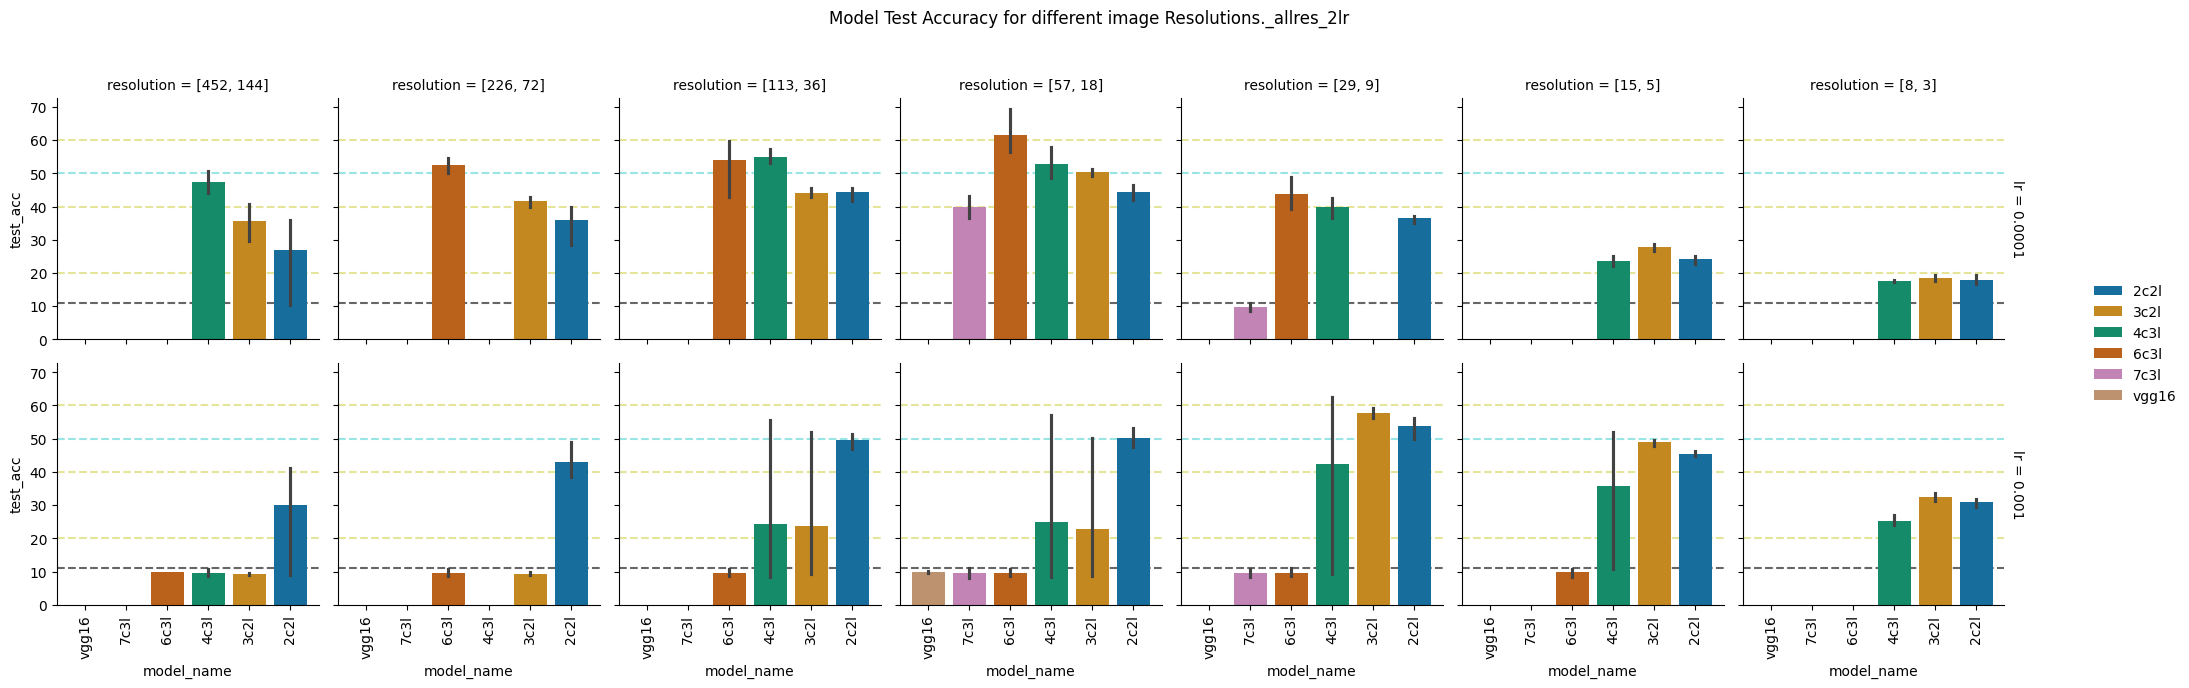

In [40]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)&(df_b_all['lr'].isin([0.001, 0.0001]))&(df_b_all['loss_fn']=='MSE')]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, col='resolution',col_order=["[452, 144]", "[226, 72]", "[113, 36]", "[57, 18]", "[29, 9]", "[15, 5]", "[8, 3]"],row="lr",margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_fewlr["model_name"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for different image Resolutions._allres_2lr")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [41]:
57*18

1026

In [42]:
(113*36)

4068

In [ ]:
(113*36)/2

In [ ]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==60)&(df_b_all['lr'].isin([0.001, 0.0001]))&(df_b_all['loss_fn']=='MSE')&(df_b_all['resolution'].isin(['[113, 36]','[57, 18]']))]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, col='resolution',col_order=["[113, 36]", "[57, 18]"],row="lr",margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_fewlr["model_name"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for different image Resolutions. 60Epochs")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==40)&(df_b_all['lr'].isin([0.0001]))&(df_b_all['loss_fn']=='MSE')&(df_b_all['resolution'].isin(['[113, 36]','[57, 18]']))]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, col='resolution',col_order=["[113, 36]", "[57, 18]"],row="lr",margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_fewlr["model_name"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 80), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for Different Image Resolutions. 40 Epochs")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
#plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
# 40 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['Current_Epoch'] ==40)&(df_b_all['lr'].isin([0.0001]))&(df_b_all['loss_fn']=='MSE')&(df_b_all['resolution'].isin(['[113, 36]','[57, 18]']))]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, col='resolution',col_order=["[113, 36]", "[57, 18]"],row="lr",margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_fewlr["model_name"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 80), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for Different Image Resolutions. 40 Epochs_lr=0.0001")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['lr'].isin([0.0001]))&(df_b_all['loss_fn']=='MSE')&(df_b_all['resolution'].isin(['[113, 36]','[57, 18]']))]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, row='Current_Epoch',col='resolution',col_order=["[113, 36]", "[57, 18]"],margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_fewlr["model_name"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for Different Image Resolutions. 40 Epochs_2lr")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")



In [ ]:
# 60 epochs
# lr == 0.001, 0.0001

df_all_B_sameparams_60_fewlr = df_b_all[(df_b_all['wd']==0)&(df_b_all['scheduler value']==0)&(df_b_all['lr'].isin([0.0001]))&(df_b_all['loss_fn']=='MSE')&(df_b_all['resolution'].isin(['[113, 36]','[57, 18]']))]
#df_all_B_sameparams_60_log = df_all_B_sameparams_60[(df_all_B_sameparams_60['lr'].isin([1.00e-01,1.00e-02, 1.00e-03,1.00e-04, 1.00e-05]))]


g= sns.FacetGrid(df_all_B_sameparams_60_fewlr, row='resolution',col='Current_Epoch',row_order=["[113, 36]", "[57, 18]"],margin_titles=True, legend_out=True)

g.map(sns.barplot, "model_name", "test_acc", hue=df_all_B_sameparams_60_fewlr["model_name"], order=["vgg16", "7c3l", "6c3l", "4c3l", "3c2l", "2c2l"], palette="colorblind")

for ax in g.axes_dict.values():
    g.tick_params(axis='x', rotation=90)
    ax.axline((0, 11), slope=0, c="0.4", ls="--", zorder=0)
    ax.axline((0, 50), slope=0, c=("c",0.4), ls="--", zorder=0)
    #ax.axline((0, 50), slope=0, c=("c", 0.2), ls="--", zorder=0)
    ax.axline((0, 20), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 40), slope=0, c=("y",0.4), ls="--", zorder=0)
    ax.axline((0, 60), slope=0, c=("y",0.4), ls="--", zorder=0)

g.add_legend()

name = ("Model Test Accuracy for Different Image Resolutions. 40 Epochs")
#'.././res_big_loop_saves/detailed plots_batchd and unbatched/'
g.figure.suptitle(name, y=1.09)
plt.savefig('.././res_big_loop_saves/detailed plots_batchd and unbatched/'+name+'.png', format='png',bbox_inches="tight")

